# Classification

In [98]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm

In [99]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize

In [100]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [101]:
import warnings

warnings.filterwarnings("ignore")

## Q13

### (a)

In [102]:
weekly = load_data("Weekly")

In [103]:
weekly.sample(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
307,1996,0.650,-0.712,-0.185,1.730,1.168,0.269873,0.127,Up
98,1991,5.018,0.668,1.417,1.034,-0.245,0.174680,3.169,Up
128,1992,-0.967,0.241,0.692,2.062,-0.054,0.173812,3.064,Up
414,1998,3.646,-4.856,4.120,-1.090,-0.693,0.638920,-0.408,Down
1020,2009,-1.218,0.273,2.195,-0.632,2.329,5.286260,2.591,Up


In [104]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [105]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [106]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

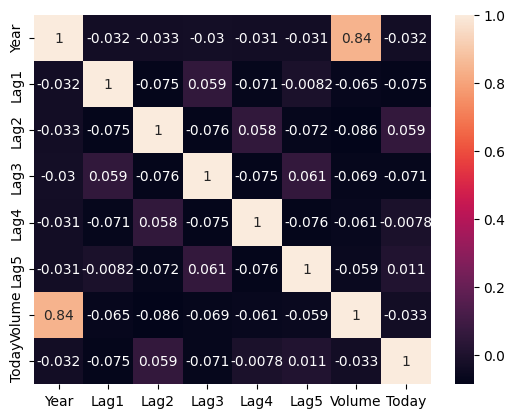

In [107]:
sns.heatmap(weekly.corr(), annot=True)

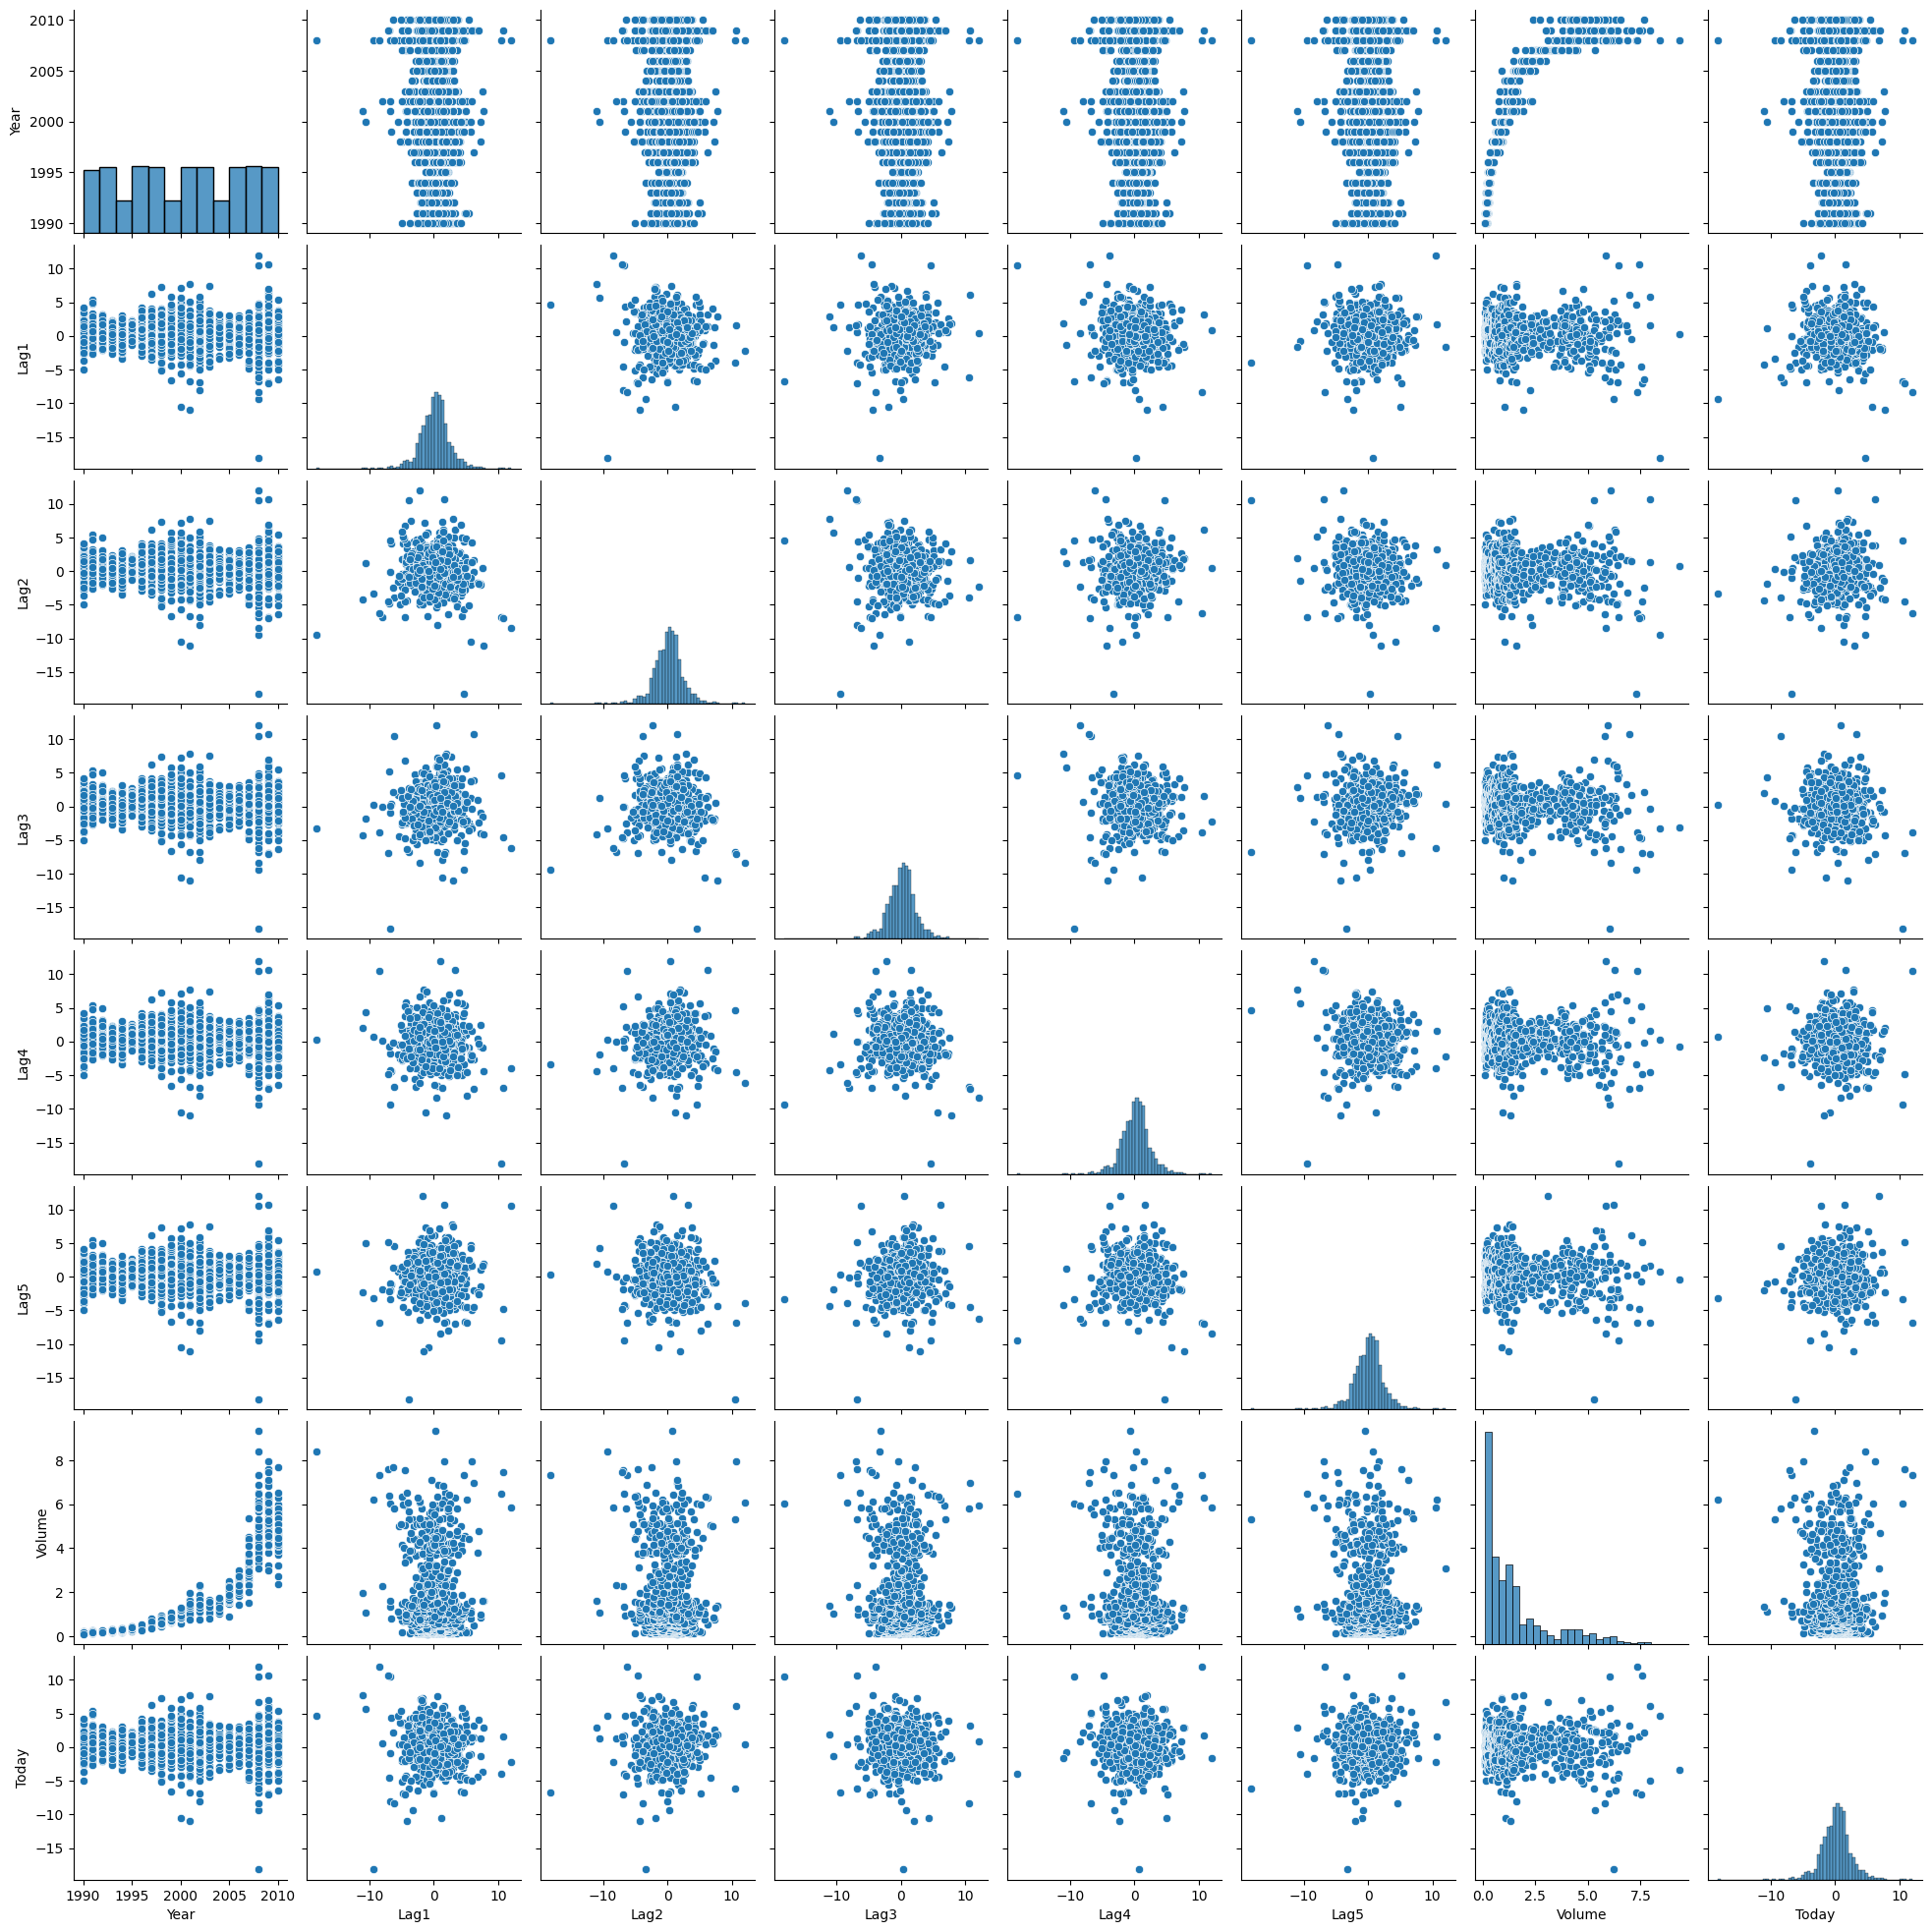

In [108]:
sns.pairplot(weekly)

### (b)

In [109]:
X = MS(weekly.drop(["Year", "Today", "Direction"], axis=1)).fit_transform(weekly)
y = weekly["Direction"] == "Up"
glm8 = sm.GLM(y, X, family=sm.families.Binomial())
results8 = glm8.fit()
summarize(results8)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


### (c)

In [110]:
labels8 = np.array(["Down"] * len(X))
labels8[results8.predict() > 0.5] = "Up"
conf_mat8 = confusion_table(labels8, weekly["Direction"])
conf_mat8

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [111]:
print('Overall fraction of correct predictions is ', (conf_mat8.Down[0]+conf_mat8.Up[1])/conf_mat8.sum().sum())

Overall fraction of correct predictions is  0.5610651974288338


### (d)

In [112]:
train = (weekly.Year > 2009)
weekly_train = weekly.loc[train]
weekly_test = weekly.loc[~train]
L_train, L_test = weekly.Direction.loc[train], weekly.Direction.loc[~train]

In [113]:
weekly_train_X , weekly_test_X = X.loc[train], X.loc[~train]
weekly_train_y, weekly_test_y = y.loc[train], y.loc[~train]
glm8d = sm.GLM(weekly_train_y, weekly_train_X, family=sm.families.Binomial())
results8d = glm8d.fit()
preds8d = results8d.predict(exog=weekly_test_X)
labels8d = np.array(["Down"] * len(weekly_test_X))
labels8d[preds8d > 0.5] = "Up"
conf_mat_8d = confusion_table(labels8d, L_test)
conf_mat_8d

Truth,Down,Up
Predicted,,
Down,31,31
Up,433,542


In [114]:
acc_8d = (conf_mat_8d.Down[0]+conf_mat_8d.Up[1])/conf_mat_8d.sum().sum()
print('Overall fraction of correct predictions is ', acc_8d)

Overall fraction of correct predictions is  0.5525554484088717


### (e)

In [115]:
lda8 = LDA(store_covariance=True)
weekly_train_X, weekly_test_X = [M.drop(columns=['intercept'])
                   for M in [weekly_train_X, weekly_test_X]]
lda8.fit(weekly_train_X, weekly_train_y)

LinearDiscriminantAnalysis(store_covariance=True)

In [131]:
preds8e = lda8.predict(weekly_test_X)
preds8e = np.where(preds8e==True, "Up", "Down")
conf_mat_8e = confusion_table(preds8e, L_test)
conf_mat_8e

Truth,Down,Up
Predicted,,
Down,28,28
Up,436,545


In [132]:
acc_8e = (conf_mat_8e.Down[0]+conf_mat_8e.Up[1])/conf_mat_8e.sum().sum()
print('Overall fraction of correct predictions is ', acc_8e)

Overall fraction of correct predictions is  0.5525554484088717


### (f)